In [1]:
import graphviz as gr

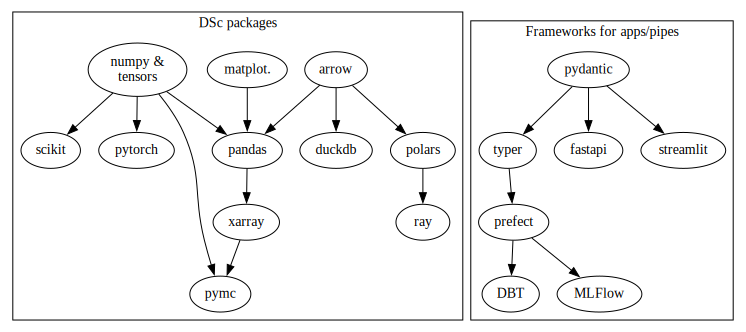

In [121]:
g = gr.Digraph()
g.attr(compound='true', orientation="P")

with g.subgraph(name='cluster_ds') as c1:
    c1.attr(label='DSc packages')
    c1.edge("arrow", "pandas")
    c1.edge("numpy &\ntensors", "pandas")
    c1.edge("matplot.", "pandas")
    c1.edge("pandas", "xarray")
    c1.edge("xarray", "pymc")
    c1.edge("numpy &\ntensors", "scikit")
    c1.edge("numpy &\ntensors", "pytorch")
    c1.edge("arrow", "duckdb")
    c1.edge("arrow", "polars")
    c1.edge("numpy &\ntensors", "pymc")
    c1.edge("polars", "ray")

with g.subgraph(name='cluster_fullstack') as c4:
    c4.attr(label='Frameworks for apps/pipes')
    c4.edge("pydantic", "typer")
    c4.edge("pydantic", "fastapi")
    c4.edge("pydantic", "streamlit")
    c4.edge("prefect", "DBT")
    c4.edge("prefect", "MLFlow")
    c4.edge("typer", "prefect")

g

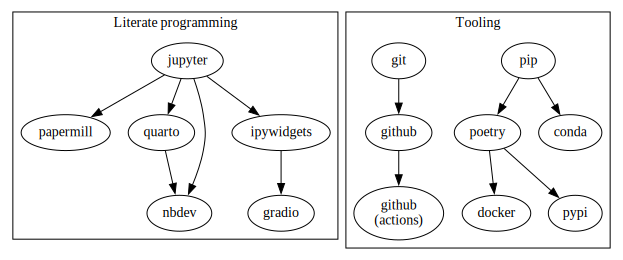

In [126]:
g = gr.Digraph()
g.attr(compound='true', orientation="P")

with g.subgraph(name='cluster_litrprog') as c2:
    c2.attr(label='Literate programming')
    c2.edge("jupyter", "papermill", )
    c2.edge("jupyter", "quarto", )
    c2.edge("quarto", "nbdev")
    c2.edge("jupyter", "nbdev")
    c2.edge("jupyter", "ipywidgets")
    c2.edge("ipywidgets", "gradio")

with g.subgraph(name='cluster_tooling') as c3:
    c3.attr(label='Tooling')
    c3.edge("pip", "poetry")
    c3.edge("poetry", "docker")
    c3.edge("pip", "conda")
    c3.edge("git", "github")
    c3.edge("github", "github\n(actions)")
    c3.edge("poetry", "pypi")

g

this is the old probability tree again!


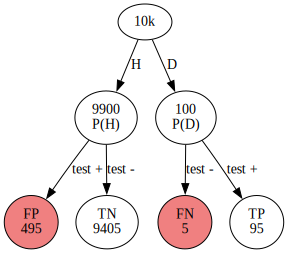

In [119]:
g = gr.Digraph()
g.attr(compound='true', orientation="P")

g = gr.Digraph()

g.edge("10k", "9900\nP(H)", label="H")
g.edge("9900\nP(H)", "FP\n495", label="test +")
g.edge("9900\nP(H)", "TN\n9405", label="test -")
g.node("FP\n495", fillcolor="lightcoral", style="filled")

g.edge("10k", "100 \nP(D)", label="D", )
g.edge("100 \nP(D)", "FN\n5", label="test -")
g.edge("100 \nP(D)", "TP\n95", label="test +")
g.node("FN\n5", fillcolor="lightcoral", style="filled")

print("this is the old probability tree again!")
g

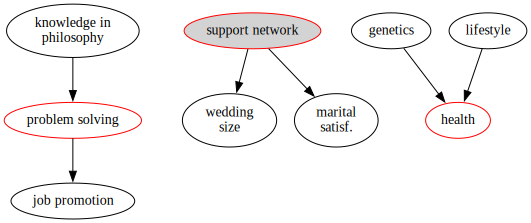

In [4]:
g = gr.Digraph()

g.edge("knowledge in \n philosophy", "problem solving")
g.edge("problem solving", "job promotion")
g.node("problem solving", color = "red")

g.edge("support network", "wedding \n size")
g.edge("support network", "marital \n satisf.")
g.node("support network", color = "red", fillcolor="lightgrey", style="filled")


g.edge("genetics", "health")
g.edge("lifestyle", "health")
g.node("health", color = "red")

g